# Machine Learning
---

## 1. What will happen to a dog in the shelter?

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
unique_df = pd.read_csv("../data/unique_austin_shelter.csv")
unique_df.set_index("animal_id", inplace=True)

In [4]:
features = ['is_mixed','intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in']
features1 = ['intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in']
features2 = ['is_mixed', 'sex', 'fixed', 'time_in_shelter', 'age_in']
features3 = ['intake_condition', 'sex', 'time_in_shelter', 'age_in']
features4 = ['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in']
features5 = ['is_mixed', 'sex', 'fixed', 'age_in']

In [5]:
new_unique_df = unique_df[unique_df.in_shelter == "No"][['is_mixed', 'intake_condition', 'intake_type', 'name', 'sex', 'fixed', 'time_in_shelter', 'has_name', 'age_in','outcome_type']]

In [6]:
temp = new_unique_df.time_in_shelter.apply(pd.to_timedelta)
temp = temp.apply(lambda x:( x.days*24*60*60 + x.seconds)/60)
new_unique_df.time_in_shelter = temp
new_unique_df.time_in_shelter.dtype


dtype('float64')

In [7]:
new_unique_df.dropna(inplace=True)

In [8]:
new_unique_df.head()

,is_mixed,intake_condition,intake_type,name,sex,fixed,time_in_shelter,has_name,age_in,outcome_type
animal_id,,,,,,,,,,
A786884,1,Normal,Stray,Brock,Male,Yes,7132.0,1,2.000000,Transfer
A706918,0,Normal,Stray,Belle,Female,Yes,134.0,1,8.005479,Return to Owner
A724273,1,Normal,Stray,Runster,Male,No,9994.0,1,0.994521,Return to Owner
A778404,1,Normal,Owner Surrender,Max,Male,No,4784.0,1,4.002740,Adoption
A682524,1,Normal,Stray,Rio,Male,Yes,4538.0,1,4.002740,Return to Owner


## Defining Training Data

## Model: KNeighborsClassifier 
### Feature Selection

In [8]:
model = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

pipeline = Pipeline([
    ("vectorizer", vec), 
    ("scaler", scaler), 
    ("model", model)
])


for feat in [features, features1, features2, features3, features4, features5]:
    x_train_dict = new_unique_df[feat].to_dict(orient="records")
    y_train = new_unique_df['outcome_type']
    print(feat, cross_val_score(pipeline, x_train_dict, y_train, cv=5, scoring="accuracy").mean())

['is_mixed', 'intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.7032228834323774
['intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.7077282319862647
['is_mixed', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.6436777812883262
['intake_condition', 'sex', 'time_in_shelter', 'age_in'] 0.6489118793058553
['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in'] 0.5778185926872705
['is_mixed', 'sex', 'fixed', 'age_in'] 0.5211608681390264


### Scaler testing

In [9]:
x_train_dict = new_unique_df[features1].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

In [10]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [11]:
grid_kn = GridSearchCV(pipeline,param_grid=dict(scaler=scalers),cv=5, verbose=5, n_jobs=-1)
grid_kn.fit(x_train_dict, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  1.0min remaining:   34.2s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  1.1min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=30, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), MaxAbsScaler(copy=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [12]:
print(grid_kn.best_score_)
print(grid_kn.best_estimator_.steps)

0.7174671657889727
[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=30, p=2,
           weights='uniform'))]


In [13]:
pd.DataFrame(grid_kn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.389178,1.737522,5.464291,2.580006,"StandardScaler(copy=True, with_mean=True, with...","{'scaler': StandardScaler(copy=True, with_mean...",0.704502,0.709324,0.709549,0.705014,...,0.707728,0.002450,3,0.722456,0.721685,0.720041,0.721372,0.720817,0.721274,0.000813
1,1.797246,0.486609,3.444275,0.803026,"Normalizer(copy=True, norm='l2')","{'scaler': Normalizer(copy=True, norm='l2')}",0.708941,0.712020,0.713198,0.710885,...,0.712709,0.003218,2,0.725787,0.724619,0.723293,0.723037,0.722799,0.723907,0.001132
2,4.326220,1.045597,4.645742,0.474498,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'scaler': MinMaxScaler(copy=True, feature_ran...",0.697368,0.698065,0.700825,0.694224,...,0.697957,0.002205,4,0.713849,0.712881,0.712864,0.712094,0.710349,0.712407,0.001170
3,4.784162,0.199169,4.616533,0.410775,MaxAbsScaler(copy=True),{'scaler': MaxAbsScaler(copy=True)},0.697210,0.698065,0.700666,0.694065,...,0.697798,0.002190,5,0.713929,0.712881,0.712785,0.712133,0.710349,0.712415,0.001183
4,2.382561,0.384427,3.031501,1.061002,"RobustScaler(copy=True, quantile_range=(25.0, ...","{'scaler': RobustScaler(copy=True, quantile_ra...",0.710368,0.715509,0.720654,0.717867,...,0.717467,0.004349,1,0.729277,0.728109,0.728646,0.728588,0.729461,0.728816,0.000492


Robust scaler is the best

### K value testing

In [14]:
x_train_dict = new_unique_df[features1].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = RobustScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = KNeighborsClassifier(n_jobs=-1)

In [15]:
ks = [5,10,20,30,40,50]

In [16]:
grid_kn_k = GridSearchCV(model,param_grid=dict(n_neighbors=ks),cv=5)
grid_kn_k.fit(x_train_sc, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print(grid_kn_k.best_score_)
print(grid_kn_k.best_estimator_.n_neighbors)

0.7177526806674703
40


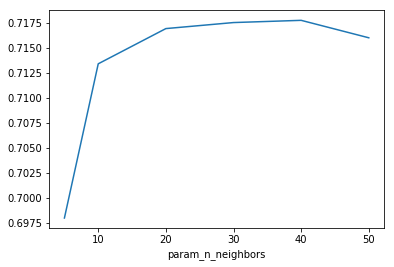

In [18]:
pd.DataFrame(grid_kn_k.cv_results_).set_index("param_n_neighbors")['mean_test_score'].plot.line()

### Model Results

accuracy = 0.7177526806674703

k = 40

scaler = RobustScaler()

features = features1

model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None)

## Model: RandomForestClassifier

In [19]:
model = RandomForestClassifier(n_jobs=-1)
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

pipeline = Pipeline([
    ("vectorizer", vec), 
    ("scaler", scaler), 
    ("model", model)
])


for feat in [features, features1, features2, features3, features4, features5]:
    x_train_dict = new_unique_df[feat].to_dict(orient="records")
    y_train = new_unique_df['outcome_type']
    print(feat, cross_val_score(pipeline, x_train_dict, y_train, cv=5, scoring="accuracy").mean())

['is_mixed', 'intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.682318257684175
['intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.6818729581376433
['is_mixed', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.607164489003684
['intake_condition', 'sex', 'time_in_shelter', 'age_in'] 0.6085908160918031
['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in'] 0.5556448903594655
['is_mixed', 'sex', 'fixed', 'age_in'] 0.5029837632974529


### Scaler Testing

In [20]:
x_train_dict = new_unique_df[features].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

In [21]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [22]:
grid_rf = GridSearchCV(pipeline,param_grid=dict(scaler=scalers),cv=5, verbose=5, n_jobs=-1)
grid_rf.fit(x_train_dict, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    7.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    8.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), MaxAbsScaler(copy=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [23]:
print(grid_rf.best_score_)
print(grid_rf.best_estimator_.steps)

0.6995749000697925
[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', Normalizer(copy=True, norm='l2')), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]


In [24]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.388189,0.024891,0.150824,0.004430,"StandardScaler(copy=True, with_mean=True, with...","{'scaler': StandardScaler(copy=True, with_mean...",0.681357,0.684586,0.691624,0.677245,...,0.684855,0.005239,2,0.970691,0.969622,0.969942,0.969350,0.970896,0.970100,0.000600
1,0.631151,0.142016,0.206917,0.055498,"Normalizer(copy=True, norm='l2')","{'scaler': Normalizer(copy=True, norm='l2')}",0.701015,0.702188,0.700825,0.691526,...,0.699575,0.004068,1,0.943841,0.942933,0.948450,0.947264,0.943497,0.945197,0.002223
2,0.885217,0.068848,0.206124,0.016098,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'scaler': MinMaxScaler(copy=True, feature_ran...",0.676601,0.678877,0.691466,0.677721,...,0.682571,0.006059,5,0.971960,0.970455,0.969387,0.969707,0.970143,0.970330,0.000893
3,0.678293,0.033933,0.220505,0.048029,MaxAbsScaler(copy=True),{'scaler': MaxAbsScaler(copy=True)},0.678662,0.680304,0.686707,0.684545,...,0.683491,0.003435,4,0.971682,0.971486,0.970616,0.970658,0.969151,0.970719,0.000893
4,0.673698,0.133581,0.177439,0.033874,"RobustScaler(copy=True, quantile_range=(25.0, ...","{'scaler': RobustScaler(copy=True, quantile_ra...",0.683893,0.681732,0.684010,0.683116,...,0.684411,0.002578,3,0.971087,0.969662,0.970378,0.971134,0.970817,0.970616,0.000547


### Parameter tuning

In [25]:
x_train_dict = new_unique_df[features].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = Normalizer()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = RandomForestClassifier(n_jobs=-1)

In [26]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 50, 90, 100],
    'max_features': [2, 3],
    'random_state': [10],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [10, 12, 15],
    'n_estimators': [300, 1000]
}

In [27]:
grid_rf_p = GridSearchCV(model,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_rf_p.fit(x_train_sc, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 49.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [10, 50, 90, 100], 'max_features': [2, 3], 'random_state': [10], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [10, 12, 15], 'n_estimators': [300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [28]:
print(grid_rf_p.best_score_)
print(grid_rf_p.best_estimator_)

0.7355814986358734
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


### Model Results

accuracy = 0.7355814986358734

scaler = Normalizer()

features = features

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

## Model: LinearSVC

In [29]:
model = LinearSVC(verbose=2)
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

pipeline = Pipeline([
    ("vectorizer", vec), 
    ("scaler", scaler), 
    ("model", model)
])


for feat in [features, features1, features2, features3, features4, features5]:
    x_train_dict = new_unique_df[feat].to_dict(orient="records")
    y_train = new_unique_df['outcome_type']
    print(feat, cross_val_score(pipeline, x_train_dict, y_train, cv=5, scoring="accuracy").mean())

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['is_mixed', 'intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.6486269295505558
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.6475794719825141
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['is_mixed', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.5903501885342708
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['intake_condition', 'sex', 'time_in_shelter', 'age_in'] 0.6080208264816255
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in'] 0.5793102526146894
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['is_mixed', 'sex', 'fixed', 'age_in'] 0.5220492634024069


### Scaler Testing

In [30]:
x_train_dict = new_unique_df[features].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

In [31]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [32]:
grid_ls = GridSearchCV(pipeline,param_grid=dict(scaler=scalers),cv=5, verbose=5, n_jobs=-1)
grid_ls.fit(x_train_dict, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  1.1min remaining:   38.5s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  1.3min remaining:   10.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.5min finished


[LibLinear]

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=2))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), MaxAbsScaler(copy=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [33]:
print(grid_ls.best_score_)
print(grid_ls.best_estimator_.steps)

0.6539876911363492
[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('model', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=2))]


### Parameter tuning

In [34]:
x_train_dict = new_unique_df[features].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = Normalizer()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = LinearSVC()

In [35]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500,1000,1500]
}

In [36]:
grid_ls_p = GridSearchCV(model,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_ls_p.fit(x_train_sc, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [500, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [37]:
print(grid_ls_p.best_score_)
print(grid_ls_p.best_estimator_)

0.5426686123976905
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=500,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


### Model Results

accuracy = 0.5426686123976905

scaler = RobustScaler()

features = features

model = LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=500,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Model: BaggingClassifier

In [38]:
model = BaggingClassifier(n_jobs=-1)
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

pipeline = Pipeline([
    ("vectorizer", vec), 
    ("scaler", scaler), 
    ("model", model)
])


for feat in [features, features1, features2, features3, features4, features5]:
    x_train_dict = new_unique_df[feat].to_dict(orient="records")
    y_train = new_unique_df['outcome_type']
    print(feat, cross_val_score(pipeline, x_train_dict, y_train, cv=5, scoring="accuracy").mean())

['is_mixed', 'intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.6966564793830872
['intake_condition', 'intake_type', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.7007167493294919
['is_mixed', 'sex', 'fixed', 'time_in_shelter', 'age_in'] 0.6202020697585997
['intake_condition', 'sex', 'time_in_shelter', 'age_in'] 0.6205505114944501
['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in'] 0.5584047106254516
['is_mixed', 'sex', 'fixed', 'age_in'] 0.5052356678565763


### Scaler Testing

In [39]:
x_train_dict = new_unique_df[features1].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

In [40]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [41]:
grid_bc = GridSearchCV(pipeline,param_grid=dict(scaler=scalers),cv=5, verbose=5, n_jobs=-1)
grid_bc.fit(x_train_dict, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:   10.3s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:   12.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), MaxAbsScaler(copy=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [42]:
print(grid_bc.best_score_)
print(grid_bc.best_estimator_.steps)

0.7015100564684982
[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', MaxAbsScaler(copy=True)), ('model', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))]


In [43]:
pd.DataFrame(grid_bc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.198086,0.074320,0.081228,0.007823,"StandardScaler(copy=True, with_mean=True, with...","{'scaler': StandardScaler(copy=True, with_mean...",0.697844,0.698224,0.701459,0.695176,...,0.697671,0.002235,4,0.975371,0.973350,0.976644,0.975852,0.975178,0.975279,0.001089
1,3.070022,0.233845,0.139015,0.013698,"Normalizer(copy=True, norm='l2')","{'scaler': Normalizer(copy=True, norm='l2')}",0.687223,0.699175,0.697494,0.683910,...,0.692532,0.005945,5,0.957127,0.957368,0.957253,0.957375,0.957811,0.957387,0.000231
2,1.704144,0.200334,0.123035,0.008896,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'scaler': MinMaxScaler(copy=True, feature_ran...",0.698003,0.701871,0.703680,0.691209,...,0.699702,0.004730,3,0.974538,0.975452,0.974701,0.975575,0.975099,0.975073,0.000405
3,1.900506,0.028042,0.147803,0.019733,MaxAbsScaler(copy=True),{'scaler': MaxAbsScaler(copy=True)},0.697527,0.699810,0.709708,0.697080,...,0.701510,0.004675,1,0.975648,0.973786,0.977357,0.975852,0.975496,0.975628,0.001136
4,1.776486,0.072086,0.094775,0.009417,"RobustScaler(copy=True, quantile_range=(25.0, ...","{'scaler': RobustScaler(copy=True, quantile_ra...",0.698478,0.699017,0.703046,0.698032,...,0.700114,0.002018,2,0.974260,0.975809,0.974780,0.974425,0.976289,0.975113,0.000797


### Parameter tuning

In [9]:
x_train_dict = new_unique_df[features1].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = MaxAbsScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = BaggingClassifier(n_jobs=-1)

In [10]:
param_grid = {
    'max_samples': [600,800,1000],
    'max_features': [0.5, 0.75, 1],
    'random_state': [10],
    'n_estimators': [100, 200, 300, 500]
}

In [11]:
grid_bc_p = GridSearchCV(model,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_bc_p.fit(x_train_sc, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_samples': [600, 800, 1000], 'max_features': [0.5, 0.75, 1], 'random_state': [10], 'n_estimators': [100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [12]:
print(grid_bc_p.best_score_)
print(grid_bc_p.best_estimator_)

0.7329801408540068
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.75, max_samples=1000,
         n_estimators=500, n_jobs=-1, oob_score=False, random_state=10,
         verbose=0, warm_start=False)


### Model Results

accuracy = 0.7347884017511579

scaler = Normalizer()

features = features

model = BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.75, max_samples=1000,
         n_estimators=200, n_jobs=-1, oob_score=False, random_state=10,
         verbose=0, warm_start=False)

## Predicting what will happen to a dog in the shelter
* **Best Model: RandomForestClassifier**

* 2nd Best Model: BaggingClassifier
* 3rd Model: KNeighborsClassifier
* Worst Model: LinearSVC

### Fit the model

In [14]:
x_train_dict = new_unique_df[features].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = Normalizer()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=90, 
                               max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                               min_impurity_split=None, min_samples_leaf=2, min_samples_split=15, 
                               min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1, 
                               oob_score=False, random_state=10, verbose=0, warm_start=False)
model.fit(x_train_sc, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

## Evaluating our best model

In [43]:
y_train_pred = (model.predict(x_train_sc))

### Training Accuracy

In [69]:
accuracy_score(y_train, y_train_pred)

0.7854831546221687

### Training Precision

In [68]:
for outcome_type in unique_df.outcome_type.unique():
    print(outcome_type, precision_score(y_train==outcome_type, y_train_pred==outcome_type))

Transfer 0.7699004975124378
Return to Owner 0.9263483265828182
Adoption 0.716197409270956
nan 0.0
Died 0.0
Euthanasia 0.8801652892561983
Rto-Adopt 0.0
Disposal 0.0
Missing 0.0


### Training Recall

In [60]:
for outcome_type in unique_df.outcome_type.unique():
    print(outcome_type, recall_score(y_train==outcome_type, y_train_pred==outcome_type))

Transfer 0.3750378673129355
Return to Owner 0.8716277203891285
Adoption 0.9650198341146773
nan 0.0
Died 0.0
Euthanasia 0.25326991676575505
Rto-Adopt 0.0
Disposal 0.0
Missing 0.0


### Testing our model on a dog in the shelter

In [124]:
# calculate an undaopted dog's time in shelter
def calc_time_in_shelter(date_in):
    time_in_shelter = pd.to_datetime('today') - pd.to_datetime(date_in)
    time_in_shelter = (time_in_shelter.days*24*60*60 + time_in_shelter.seconds)/60
    return time_in_shelter

In [125]:
unadopted_dogs = unique_df.loc[unique_df.in_shelter == "Yes"]
unadopted_dogs.time_in_shelter = unadopted_dogs.date_in.apply(calc_time_in_shelter)

unadopted_dogs = unadopted_dogs[features]

In [126]:
unadopted_dogs_dict = unadopted_dogs.to_dict(orient="records")
unadopted_dogs = vec.transform(unadopted_dogs_dict)
unadopted_dogs_sc = scaler.transform(unadopted_dogs)

y_test_preds = model.predict(unadopted_dogs_sc)

In [137]:
pd.DataFrame(y_test_preds)[0].value_counts()

Adoption           356
Return to Owner     38
Transfer            31
Name: 0, dtype: int64

In [140]:
(pd.DataFrame(y_test_preds)[0].value_counts() / 
 pd.DataFrame(y_test_preds)[0].value_counts().sum())

Adoption           0.837647
Return to Owner    0.089412
Transfer           0.072941
Name: 0, dtype: float64

In [139]:
(unique_df.loc[unique_df.in_shelter == "No"]['outcome_type'].value_counts() / 
unique_df.loc[unique_df.in_shelter == "No"]['outcome_type'].value_counts().sum())

Adoption           0.453396
Return to Owner    0.260584
Transfer           0.243030
Euthanasia         0.033974
Died               0.004256
Rto-Adopt          0.004155
Disposal           0.000302
Missing            0.000302
Name: outcome_type, dtype: float64

### Analysis

**We predicted that 83% of the dogs currently in the shelter will be adopted. However, based on the dogs that are no longer in the shelter, only 45% were adopted. Also, our model never predicted that the dogs currently in the shelter will never be euthanized, die, be disposed of, or go missing.**

## 2. Will your dog get adopted?

In [57]:
new_unique_df.head()

,is_mixed,intake_condition,intake_type,name,sex,fixed,time_in_shelter,has_name,age_in,outcome_type
animal_id,,,,,,,,,,
A786884,1,Normal,Stray,Brock,Male,Yes,7132.0,1,2.000000,Transfer
A706918,0,Normal,Stray,Belle,Female,Yes,134.0,1,8.005479,Return to Owner
A724273,1,Normal,Stray,Runster,Male,No,9994.0,1,0.994521,Return to Owner
A778404,1,Normal,Owner Surrender,Max,Male,No,4784.0,1,4.002740,Adoption
A682524,1,Normal,Stray,Rio,Male,Yes,4538.0,1,4.002740,Return to Owner


In [142]:
your_features1 = ['is_mixed','intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name']
your_features2 = ['intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name']
your_features3 = ['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name']
your_features4 = ['is_mixed', 'sex', 'fixed', 'age_in', 'has_name']
your_features5 = ['intake_condition', 'sex', 'age_in', 'has_name']
your_features6 = ['is_mixed', 'sex', 'fixed', 'age_in']
your_features = [your_features1, your_features2, your_features3, your_features4, your_features5, your_features6]

## Model: KNeighborsClassifier 
### Feature Selection

In [99]:
model = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

pipeline = Pipeline([
    ("vectorizer", vec), 
    ("scaler", scaler), 
    ("model", model)
])


for feat in your_features:
    x_train_dict = new_unique_df[feat].to_dict(orient="records")
    y_train = new_unique_df['outcome_type']
    print(feat, cross_val_score(pipeline, x_train_dict, y_train, cv=5, scoring="accuracy", verbose=1).mean())

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.0s finished


['is_mixed', 'intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5821020606653055


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.5s finished


['intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5824201244870114


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.4s finished


['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5778185926872705


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished


['is_mixed', 'sex', 'fixed', 'age_in', 'has_name'] 0.5211608681390264


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.3s finished


['intake_condition', 'sex', 'age_in', 'has_name'] 0.50456923284251
['is_mixed', 'sex', 'fixed', 'age_in'] 0.5211608681390264


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished


### Scaler testing

In [102]:
x_train_dict = new_unique_df[your_features2].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

In [101]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [103]:
grid_kn = GridSearchCV(pipeline,param_grid=dict(scaler=scalers),cv=5, verbose=5, n_jobs=-1)
grid_kn.fit(x_train_dict, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  1.1min remaining:   36.6s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  1.3min remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=30, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), MaxAbsScaler(copy=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [104]:
print(grid_kn.best_score_)
print(grid_kn.best_estimator_.steps)

0.5836241355243956
[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', Normalizer(copy=True, norm='l2')), ('model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=30, p=2,
           weights='uniform'))]


In [105]:
pd.DataFrame(grid_kn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.325717,1.584996,5.858148,1.601921,"StandardScaler(copy=True, with_mean=True, with...","{'scaler': StandardScaler(copy=True, with_mean...",0.571972,0.584681,0.585660,0.586322,...,0.582419,0.005313,2,0.593440,0.595733,0.593941,0.594409,0.595757,0.594656,0.000941
1,3.307196,1.115818,3.752201,0.997321,"Normalizer(copy=True, norm='l2')","{'scaler': Normalizer(copy=True, norm='l2')}",0.576094,0.583095,0.587722,0.588385,...,0.583624,0.004407,1,0.594670,0.596129,0.594734,0.592149,0.594568,0.594450,0.001285
2,4.755791,1.219479,3.382347,1.178871,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'scaler': MinMaxScaler(copy=True, feature_ran...",0.579264,0.564859,0.583439,0.587591,...,0.579754,0.007901,3,0.597010,0.579434,0.591244,0.594251,0.597145,0.591817,0.006557
3,4.119946,1.098841,4.927525,1.620165,MaxAbsScaler(copy=True),{'scaler': MaxAbsScaler(copy=True)},0.579264,0.564383,0.583122,0.587274,...,0.579532,0.007989,4,0.596891,0.579196,0.590372,0.594132,0.597304,0.591579,0.006668
4,2.987427,0.311313,2.965020,0.534475,"RobustScaler(copy=True, quantile_range=(25.0, ...","{'scaler': RobustScaler(copy=True, quantile_ra...",0.575935,0.562004,0.588515,0.582037,...,0.578104,0.008981,5,0.595661,0.577015,0.593901,0.586717,0.594568,0.589572,0.007023


### K value testing

In [106]:
x_train_dict = new_unique_df[your_features2].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = RobustScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = KNeighborsClassifier(n_jobs=-1)

In [107]:
ks = [5,10,20,30,40,50]

In [108]:
grid_kn_k = GridSearchCV(model,param_grid=dict(n_neighbors=ks),cv=5)
grid_kn_k.fit(x_train_sc, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
print(grid_kn_k.best_score_)
print(grid_kn_k.best_estimator_.n_neighbors)

0.5852103292938265
50


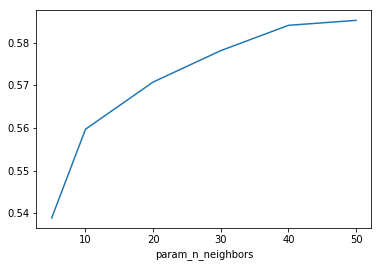

In [110]:
pd.DataFrame(grid_kn_k.cv_results_).set_index("param_n_neighbors")['mean_test_score'].plot.line()

### Model Results

accuracy = 0.5852103292938265

k = 50

scaler = RobustScaler()

features = your_features1

model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None)

## Model: RandomForestClassifier

In [70]:
model = RandomForestClassifier(n_jobs=-1)
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

pipeline = Pipeline([
    ("vectorizer", vec), 
    ("scaler", scaler), 
    ("model", model)
])


for feat in your_features:
    x_train_dict = new_unique_df[feat].to_dict(orient="records")
    y_train = new_unique_df['outcome_type']
    print(feat, cross_val_score(pipeline, x_train_dict, y_train, cv=5, scoring="accuracy").mean())

['is_mixed', 'intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5573572834417051
['intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.560117919123176
['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5576118252178109
['is_mixed', 'sex', 'fixed', 'age_in', 'has_name'] 0.5051411440320803
['intake_condition', 'sex', 'age_in', 'has_name'] 0.49016599989010273
['is_mixed', 'sex', 'fixed', 'age_in'] 0.5033957571438188


### Scaler Testing

In [71]:
x_train_dict = new_unique_df[your_features2].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

In [72]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [73]:
grid_rf = GridSearchCV(pipeline,param_grid=dict(scaler=scalers),cv=5, verbose=5, n_jobs=-1)
grid_rf.fit(x_train_dict, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    7.3s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    7.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), MaxAbsScaler(copy=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [74]:
print(grid_rf.best_score_)
print(grid_rf.best_estimator_.steps)

0.5603388109891504
[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]


In [75]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.369064,0.029137,0.152427,0.003708,"StandardScaler(copy=True, with_mean=True, with...","{'scaler': StandardScaler(copy=True, with_mean...",0.555485,0.555186,0.563135,0.567122,...,0.560339,0.004564,1,0.678234,0.678498,0.676818,0.676170,0.678707,0.677685,0.001006
1,0.503892,0.138838,0.201427,0.058907,"Normalizer(copy=True, norm='l2')","{'scaler': Normalizer(copy=True, norm='l2')}",0.556119,0.553283,0.565831,0.562044,...,0.559451,0.004402,3,0.678234,0.680084,0.678880,0.677676,0.681364,0.679248,0.001327
2,0.684687,0.065767,0.189344,0.017661,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'scaler': MinMaxScaler(copy=True, feature_ran...",0.554534,0.553758,0.564245,0.566011,...,0.559387,0.004974,4,0.678512,0.679370,0.676541,0.675734,0.679302,0.677892,0.001486
3,0.618886,0.051515,0.208576,0.021267,MaxAbsScaler(copy=True),{'scaler': MaxAbsScaler(copy=True)},0.556278,0.557723,0.563610,0.565376,...,0.560022,0.003721,2,0.678036,0.678656,0.676501,0.675535,0.678628,0.677471,0.001245
4,0.566277,0.129148,0.156887,0.013699,"RobustScaler(copy=True, quantile_range=(25.0, ...","{'scaler': RobustScaler(copy=True, quantile_ra...",0.550729,0.554710,0.563135,0.565217,...,0.557960,0.005405,5,0.678115,0.678299,0.677096,0.676209,0.678906,0.677725,0.000956


### Parameter tuning

In [76]:
x_train_dict = new_unique_df[your_features2].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = Normalizer()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = RandomForestClassifier(n_jobs=-1)

In [77]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 50, 90, 100],
    'max_features': [2, 3],
    'random_state': [10],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [10, 12, 15],
    'n_estimators': [300, 1000]
}

In [78]:
grid_rf_p = GridSearchCV(model,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_rf_p.fit(x_train_sc, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 35.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [10, 50, 90, 100], 'max_features': [2, 3], 'random_state': [10], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [10, 12, 15], 'n_estimators': [300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [79]:
print(grid_rf_p.best_score_)
print(grid_rf_p.best_estimator_)

0.5921895818793224
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


### Model Results

accuracy = 0.5921895818793224

scaler = Normalizer()

features = your_features2

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

## Model: LinearSVC

In [80]:
model = LinearSVC(verbose=2)
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

pipeline = Pipeline([
    ("vectorizer", vec), 
    ("scaler", scaler), 
    ("model", model)
])


for feat in your_features:
    x_train_dict = new_unique_df[feat].to_dict(orient="records")
    y_train = new_unique_df['outcome_type']
    print(feat, cross_val_score(pipeline, x_train_dict, y_train, cv=5, scoring="accuracy").mean())

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['is_mixed', 'intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5825460621524394
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5815626097334865
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5793419885715285
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['is_mixed', 'sex', 'fixed', 'age_in', 'has_name'] 0.5220492634024069
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['intake_condition', 'sex', 'age_in', 'has_name'] 0.5005709552426022
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]['is_mixed', 'sex', 'fixed', 'age_in'] 0.5220492634024069


### Scaler Testing

In [81]:
x_train_dict = new_unique_df[your_features2].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

In [82]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [83]:
grid_ls = GridSearchCV(pipeline,param_grid=dict(scaler=scalers),cv=5, verbose=5, n_jobs=-1)
grid_ls.fit(x_train_dict, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:   59.8s remaining:   33.6s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  1.2min remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


[LibLinear]

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=2))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), MaxAbsScaler(copy=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [84]:
print(grid_ls.best_score_)
print(grid_ls.best_estimator_.steps)

0.5817207030010786
[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('model', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=2))]


### Parameter tuning

In [85]:
x_train_dict = new_unique_df[your_features2].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = Normalizer()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = LinearSVC()

In [86]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500,1000,1500]
}

In [87]:
grid_ls_p = GridSearchCV(model,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_ls_p.fit(x_train_sc, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   56.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [500, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [88]:
print(grid_ls_p.best_score_)
print(grid_ls_p.best_estimator_)

0.568333227587082
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=500,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


### Model Results

accuracy = 0.568333227587082

scaler = Normalizer()

features = features

model = LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=500,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Model: BaggingClassifier

In [89]:
model = BaggingClassifier(n_jobs=-1)
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

pipeline = Pipeline([
    ("vectorizer", vec), 
    ("scaler", scaler), 
    ("model", model)
])


for feat in your_features:
    x_train_dict = new_unique_df[feat].to_dict(orient="records")
    y_train = new_unique_df['outcome_type']
    print(feat, cross_val_score(pipeline, x_train_dict, y_train, cv=5, scoring="accuracy").mean())

['is_mixed', 'intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5586577834647615
['intake_condition', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5605622126610765
['is_mixed', 'intake_type', 'sex', 'fixed', 'age_in', 'has_name'] 0.5592935488012417
['is_mixed', 'sex', 'fixed', 'age_in', 'has_name'] 0.5045376377427448
['intake_condition', 'sex', 'age_in', 'has_name'] 0.4891822055630194
['is_mixed', 'sex', 'fixed', 'age_in'] 0.5042838003603564


### Scaler Testing

In [90]:
x_train_dict = new_unique_df[your_features1].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

In [91]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

In [92]:
grid_bc = GridSearchCV(pipeline,param_grid=dict(scaler=scalers),cv=5, verbose=5, n_jobs=-1)
grid_bc.fit(x_train_dict, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    8.6s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    9.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), MaxAbsScaler(copy=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [93]:
print(grid_bc.best_score_)
print(grid_bc.best_estimator_.steps)

0.560370534864539
[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))]


In [94]:
pd.DataFrame(grid_bc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.693277,0.063658,0.070887,0.003383,"StandardScaler(copy=True, with_mean=True, with...","{'scaler': StandardScaler(copy=True, with_mean...",0.556595,0.555820,0.565990,0.568232,...,0.560371,0.005565,1,0.688863,0.688095,0.686970,0.686043,0.687946,0.687583,0.000978
1,1.703493,0.340098,0.123836,0.022457,"Normalizer(copy=True, norm='l2')","{'scaler': Normalizer(copy=True, norm='l2')}",0.554217,0.555344,0.563610,0.559346,...,0.558150,0.003305,5,0.688030,0.687976,0.686533,0.684933,0.686875,0.686870,0.001135
2,0.984493,0.057858,0.131823,0.026012,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'scaler': MinMaxScaler(copy=True, feature_ran...",0.551363,0.557564,0.565514,0.562361,...,0.558467,0.004994,4,0.689220,0.688174,0.687604,0.684655,0.689413,0.687813,0.001714
3,1.146454,0.089750,0.138183,0.008665,MaxAbsScaler(copy=True),{'scaler': MaxAbsScaler(copy=True)},0.552156,0.558516,0.567735,0.567598,...,0.560339,0.006312,2,0.688863,0.687897,0.686692,0.685289,0.688660,0.687480,0.001334
4,1.129060,0.089202,0.115846,0.016759,"RobustScaler(copy=True, quantile_range=(25.0, ...","{'scaler': RobustScaler(copy=True, quantile_ra...",0.551522,0.556930,0.564404,0.562520,...,0.558594,0.004538,3,0.687951,0.687936,0.686573,0.686241,0.688779,0.687496,0.000946


### Parameter tuning

In [95]:
x_train_dict = new_unique_df[your_features1].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = Normalizer()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = BaggingClassifier(n_jobs=-1)

In [96]:
param_grid = {
    'max_samples': [600,800,1000],
    'max_features': [0.5, 0.75, 1],
    'random_state': [10],
    'n_estimators': [100, 200, 300, 500]
}

In [97]:
grid_bc_p = GridSearchCV(model,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_bc_p.fit(x_train_sc, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_samples': [600, 800, 1000], 'max_features': [0.5, 0.75, 1], 'random_state': [10], 'n_estimators': [100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [98]:
print(grid_bc_p.best_score_)
print(grid_bc_p.best_estimator_)

0.5895565002220672
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.75, max_samples=800,
         n_estimators=500, n_jobs=-1, oob_score=False, random_state=10,
         verbose=0, warm_start=False)


### Model Results

accuracy = 0.5895565002220672

scaler = Normalizer()

features = features

model = BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.75, max_samples=800,
         n_estimators=500, n_jobs=-1, oob_score=False, random_state=10,
         verbose=0, warm_start=False)

---

## Predicting what will happen to your dog
* **Best Model: RandomForestClassifier**

* 2nd Best Model: BaggingClassifier
* 3rd Model: KNeighborsClassifier
* Worst Model: LinearSVC

### Fit the model

In [143]:
x_train_dict = new_unique_df[your_features2].to_dict(orient="records")
y_train = new_unique_df['outcome_type']

vec = DictVectorizer(sparse=False)
vec.fit(x_train_dict)
x_train = vec.transform(x_train_dict)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

model.fit(x_train_sc, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

## Testing our best model

#### Predicting outcome of Dog 1

In [162]:
new_dog = pd.DataFrame()
new_dog['intake_condition'] = ['Sick']
new_dog['intake_type'] = ['Owner Surrender']
new_dog['sex'] = ['Male']
new_dog['fixed'] = ["Yes"]
new_dog['age_in'] = [15]
new_dog['has_name'] = [1]

new_dog = new_dog.to_dict(orient="records")
new_dog = vec.transform(new_dog)
new_dog_sc = scaler.transform(new_dog)

model.predict(new_dog_sc)

array(['Euthanasia'], dtype=object)

#### Predicting outcome of Dog 2

In [163]:
new_dog_2 = pd.DataFrame()
new_dog_2['intake_condition'] = ['Normal']
new_dog_2['intake_type'] = ['Stray']
new_dog_2['sex'] = ['Female']
new_dog_2['fixed'] = ["No"]
new_dog_2['age_in'] = [2]
new_dog_2['has_name'] = [0]

new_dog_2 = new_dog_2.to_dict(orient="records")
new_dog_2 = vec.transform(new_dog_2)
new_dog_2_sc = scaler.transform(new_dog_2)

model.predict(new_dog_2_sc)

array(['Adoption'], dtype=object)

#### Predicting outcome of Dog 3

In [164]:
new_dog_3 = pd.DataFrame()
new_dog_3['intake_condition'] = ['Feral']
new_dog_3['intake_type'] = ['Stray']
new_dog_3['sex'] = ['Male']
new_dog_3['fixed'] = ["No"]
new_dog_3['age_in'] = [4]
new_dog_3['has_name'] = [0]

new_dog_3 = new_dog_3.to_dict(orient="records")
new_dog_3 = vec.transform(new_dog_3)
new_dog_3_sc = scaler.transform(new_dog_3)

model.predict(new_dog_3_sc)

array(['Transfer'], dtype=object)

### Analysis

**Dog 1:** A sick, male, neutured dog that was surrendered by it's owner at 15 years old was predicted to be euthanized.

**Dog 2:** A normal, female, unspayed, 2 year old, unnamed, stray dog was predicted to be Adopted. :)

**Dog 3:** A feral, male, unneutered, 4 year old, unnamed dog was predicted to be Transfered.